In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

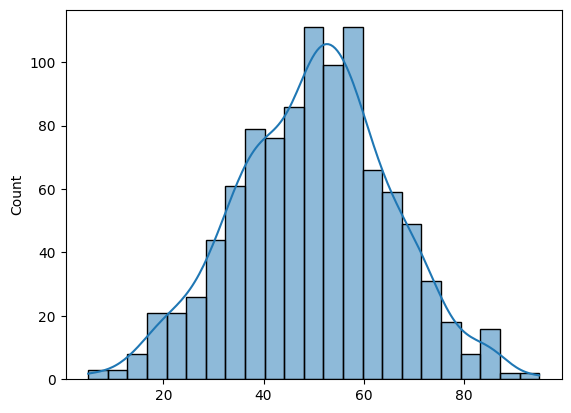

In [2]:
mean = 50
stDev = 15
val = np.random.normal(mean, stDev, size=1000)
val = np.clip(val, 5, 95)

sns.histplot(val, kde=True)
plt.show()

In [7]:
print(min(val), max(val))

5.0 95.0


In [8]:
marks = np.random.normal(mean, stDev, size=(100000, 2))
marks = np.clip(marks, 5, 95)

In [9]:
df = pd.DataFrame(marks, columns=['SUB-1', 'SUB-2'])

In [10]:
df['Result'] = df.apply(lambda row: int((row > 55).any()), axis=1)

In [11]:
df.sample(5)

,SUB-1,SUB-2,Result
47307,31.102927,37.847620,0
21667,49.359261,61.468781,1
52745,36.670066,60.766368,1
93363,45.167915,37.918942,0
84004,41.603323,61.080018,1


In [12]:
df['Result'].value_counts()

Result
1    60282
0    39718
Name: count, dtype: int64

In [13]:
X = df.iloc[:, :2].values
Y = df.iloc[:, -1].values

In [14]:
X.shape, Y.shape

((100000, 2), (100000,))

In [15]:
xTrain, xTest = X[:80000, :], X[80000:, :]
xTrain.shape, xTest.shape

((80000, 2), (20000, 2))

In [16]:
yTrain, yTest = Y[:80000], Y[80000:]
yTrain.shape, yTest.shape

((80000,), (20000,))

In [17]:
# initialize parameters
def initialize(ldims):
    inputLayer = ldims[0]
    hiddenLayer = ldims[1]
    outputLayer = ldims[2]

    params = {}
    params['W0'] = np.random.randn(hiddenLayer, inputLayer)
    params['B0'] = np.zeros(hiddenLayer)
    params['W1'] = np.random.randn(outputLayer, hiddenLayer)
    params['B1'] = np.zeros(outputLayer)

    return params

In [18]:
def sigmoid(x, dvt=False):
    x = np.clip(x, -88.72, 88.72)
    z = np.exp(-x)
    if dvt:
        return z / (1 + z)**2
    return 1 / (1 + z)

In [19]:
def forward(x, p):
    nnState = {}
    nnState['Z1'] = np.dot(p['W0'], x.T)
    nnState['A1'] = sigmoid(nnState['Z1'])
    nnState['Z2'] = np.dot(p['W1'], nnState['A1'])
    nnState['A2'] = sigmoid(nnState['Z2'])
    return nnState

In [20]:
def cost(a, y):
    c = np.dot(y, np.log(a).T) + np.dot((1 - y), np.log(1 - a).T)
    return -c/y.shape[0]

In [36]:
def backPropagation(state, params, x, y):
    m = y.shape[0]
    dZ2 = state['A2'] - y
    dW2 = 1./m * np.dot(dZ2, state['A1'].T)
    dB2 = 1./m * np.sum(dZ2)

    dZ1 = np.dot(params['W1'].T, dZ2)
    dW1 = 1./m * np.dot(dZ1, x)
    dB1 = 1./m * np.sum(dZ1)

    return dW1, dB1, dW2, dB2

In [37]:
def predict(x, params):
    res = forward(x, params)
    yPred = np.array(res['A2']>0.5, dtype='int8')
    return np.squeeze(yPred)

In [38]:
l = [xTrain.shape[1], 3, 1]
params = initialize(l)
iters = 1000
lr = 0.01
t = []
c = []
a = []
for i in range(iters):
    nn = forward(xTrain, params)
    if i % (iters/10) == 0:
        t.append(i)
        c.append(cost(nn['A2'], yTrain))
        a.append(np.sum(predict(xTrain, params) == yTrain)/yTrain.shape[0])

    dW0, dB0, dW1, dB1 = backPropagation(nn, params, xTrain, yTrain)

    params['W0'] -= lr * dW0
    params['B0'] -= lr * dB0
    params['W1'] -= lr * dW1
    params['B1'] -= lr * dB1

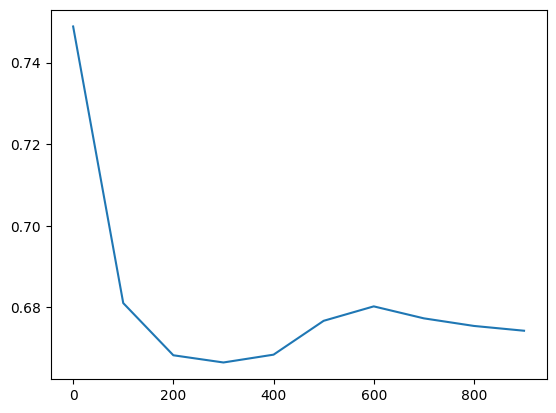

In [40]:
plt.plot(t, c)

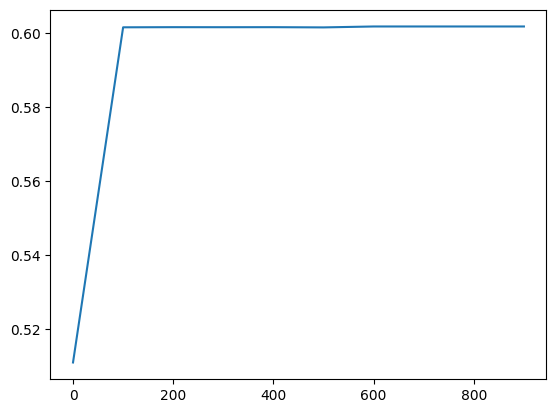

In [41]:
plt.plot(t, a)

In [250]:
# training accuracy
predTrain = predict(xTrain, params)
np.sum(predTrain == yTrain)/yTrain.shape[0]

0.601225

In [251]:
# testing accuracy
predTest = predict(xTest, params)
np.sum(predTest == yTest)/yTest.shape[0]

0.5981

In [39]:
yTrain.shape

(80000,)